### Задание №3
* `Вводные данные`: 
Дана выгрузка данных пользователей в виде когортного анализа. Стоимость подписки, которую приобретали пользователи мобильного приложения – 9,99$. 

* `Задача`:
Необходимо рассчитать прогнозный `LTV24` (сколько нам принесет пользователь на протяжении 24-х месяцев использования приложения) на основании имеющихся данных.
Следует учитывать, что с покупки подписки 30% от стоимости подписки забирает Apple в первый год, 15% - во второй.

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Data_Analyst.xlsx', sheet_name=2)
df

,Active monthly subscribers amount,Date,Trial,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,...,Month 15,Month 16,Month 17,Month 18,Month 19,Month 20,Month 21,Month 22,Month 23,Month 24
0,NaN,2017-04-01,1501,711,437.0,286.0,206.0,142.0,116.0,95.0,...,32.0,27.0,21.0,18.0,15.0,14.0,11.0,9.0,NaN,NaN
1,NaN,2017-05-01,1253,544,338.0,246.0,178.0,138.0,109.0,89.0,...,21.0,19.0,16.0,15.0,15.0,13.0,13.0,NaN,NaN,NaN
2,NaN,2017-06-01,1226,522,319.0,228.0,169.0,133.0,99.0,82.0,...,27.0,26.0,25.0,23.0,21.0,19.0,NaN,NaN,NaN,NaN
3,NaN,2017-07-01,1484,538,297.0,201.0,147.0,112.0,85.0,77.0,...,32.0,30.0,23.0,20.0,18.0,NaN,NaN,NaN,NaN,NaN
4,NaN,2017-08-01,2009,775,449.0,317.0,257.0,198.0,170.0,148.0,...,51.0,41.0,38.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2017-09-01,2132,940,580.0,384.0,289.0,225.0,177.0,146.0,...,44.0,39.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2017-10-01,1231,467,279.0,196.0,148.0,103.0,84.0,62.0,...,21.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2017-11-01,1035,392,194.0,128.0,118.0,80.0,65.0,65.0,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2017-12-01,511,241,127.0,94.0,87.0,57.0,51.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,2018-01-01,2167,756,439.0,311.0,244.0,186.0,140.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### прибыль от пользователей первой когорты за первый год

In [3]:
res1 = df.iloc[0, 3:15].sum() * 9.99 * 0.7 
res1

15979.005

#### прибыль от пользователей первой когорты за оставшийся период

In [4]:
res2 = df.iloc[0, 15:].sum() * 9.99 * 0.85 
res2

1893.6045

#### общая прибыль от пользователей первой когорты

In [5]:
res = res1 + res2
res

17872.6095

#### средняя прибыль в течении всего периода сотрудничества от одного пользователя первой когорты за один месяц

In [6]:
res_month = res / 711 / len(df.iloc[0, 3:].dropna())
res_month

1.1426038550057536

#### прогнозируемый доход от одного пользователя в течении первых 24 месяцев сотрудничества

In [7]:
res24 = res / 711 + res_month * (24-len(df.iloc[0, 3:].dropna()))
res24 

27.422492520138086

### Retention первой когорты

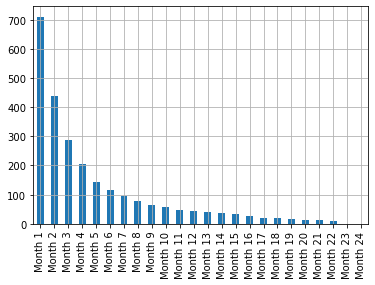

In [8]:
ax = df.iloc[0, 3:].plot(kind='bar', grid=True)
ax.get_yaxis().get_major_formatter().set_scientific(False) 